## 调用

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.stats import spearmanr
import pingouin as pg
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams["figure.figsize"] = [27.50, 12.50]

excel = pd.read_excel("../B题数据.xlsx")

data = excel.iloc[0:,2:]    
ana_ff1 = pd.DataFrame(data)

## 第二题

2、分析高锰酸盐指数、氨氮、总磷、总氮的高低，与哪些因素具有相关性，仅限给出的数据项目，并据此评估呈现当前分布特征的原因。  
*（相关性分析，评估原因）*





### 变量关系散点图

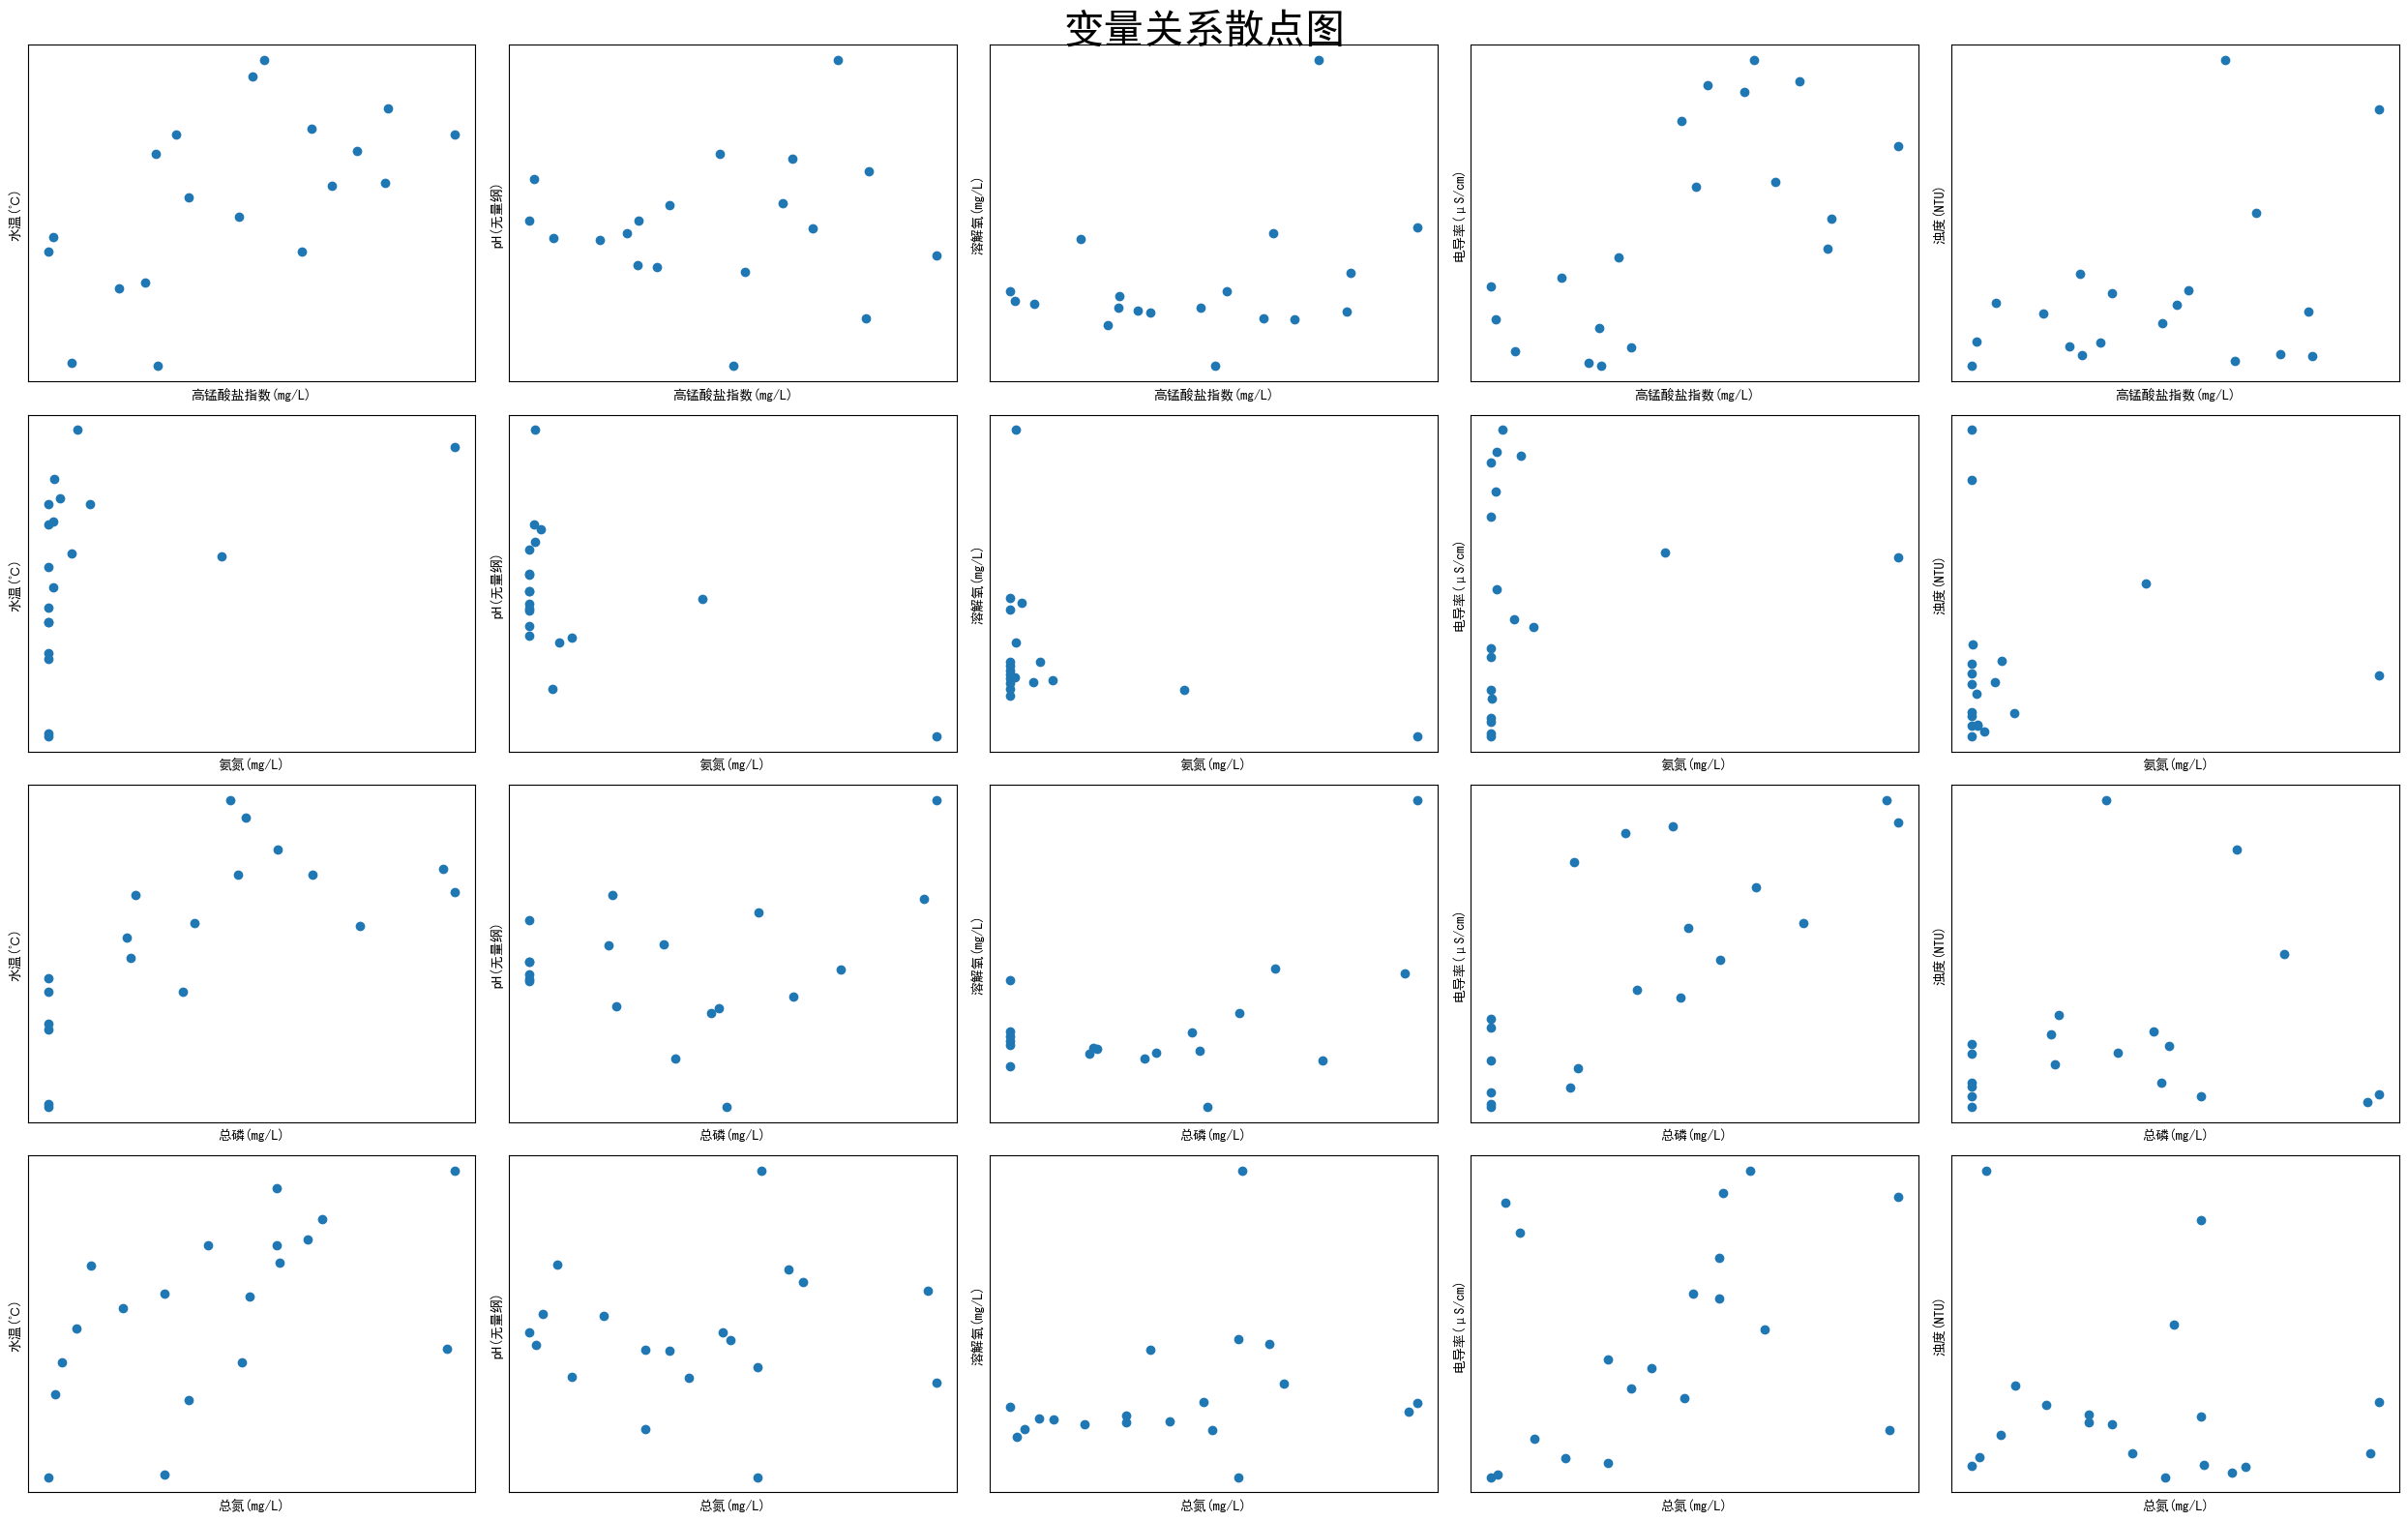

In [2]:
ana_f1 = ana_ff1[['高锰酸盐指数(mg/L)','氨氮(mg/L)','总磷(mg/L)','总氮(mg/L)']]
ana_f2 = ana_ff1[['水温(℃)','pH(无量纲)','溶解氧(mg/L)','电导率(μS/cm)','浊度(NTU)']]

fig, axs = plt.subplots(4, 5, figsize=(25, 16))  # 调整figsize以适应你的需求  
axs = axs.flatten()  # 将2D数组展平为1D数组，方便遍历  
fontdict={'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 30}
plt.suptitle('变量关系散点图', fontsize=30)

# 遍历ana_f1和ana_f2的列，生成散点图  
columns_f1 = ana_f1.columns  
columns_f2 = ana_f2.columns  
for i, col1 in enumerate(columns_f1):  
    for j, col2 in enumerate(columns_f2):  
        # 计算当前子图的索引  
        ax_index = i * len(columns_f2) + j  
        # 确保索引没有超出axs数组的范围  
        if ax_index < len(axs):  
            ax = axs[ax_index]  
            # 绘制散点图  
            ax.scatter(ana_f1[col1], ana_f2[col2])  
            # 设置x轴和y轴的标签  
            ax.set_xlabel(col1)  
            ax.set_ylabel(col2)  
            # 移除刻度标签，使图更简洁（可选）  
            ax.set_xticks([])  
            ax.set_yticks([])  
        else:  
            # 如果索引超出范围，则打印警告  
            print(f"Warning: Not enough axes for {col1} vs {col2}")  

# 调整子图间距  
plt.tight_layout()  
  
# 显示图形  
plt.show()

### 三种相关系数及其热力图

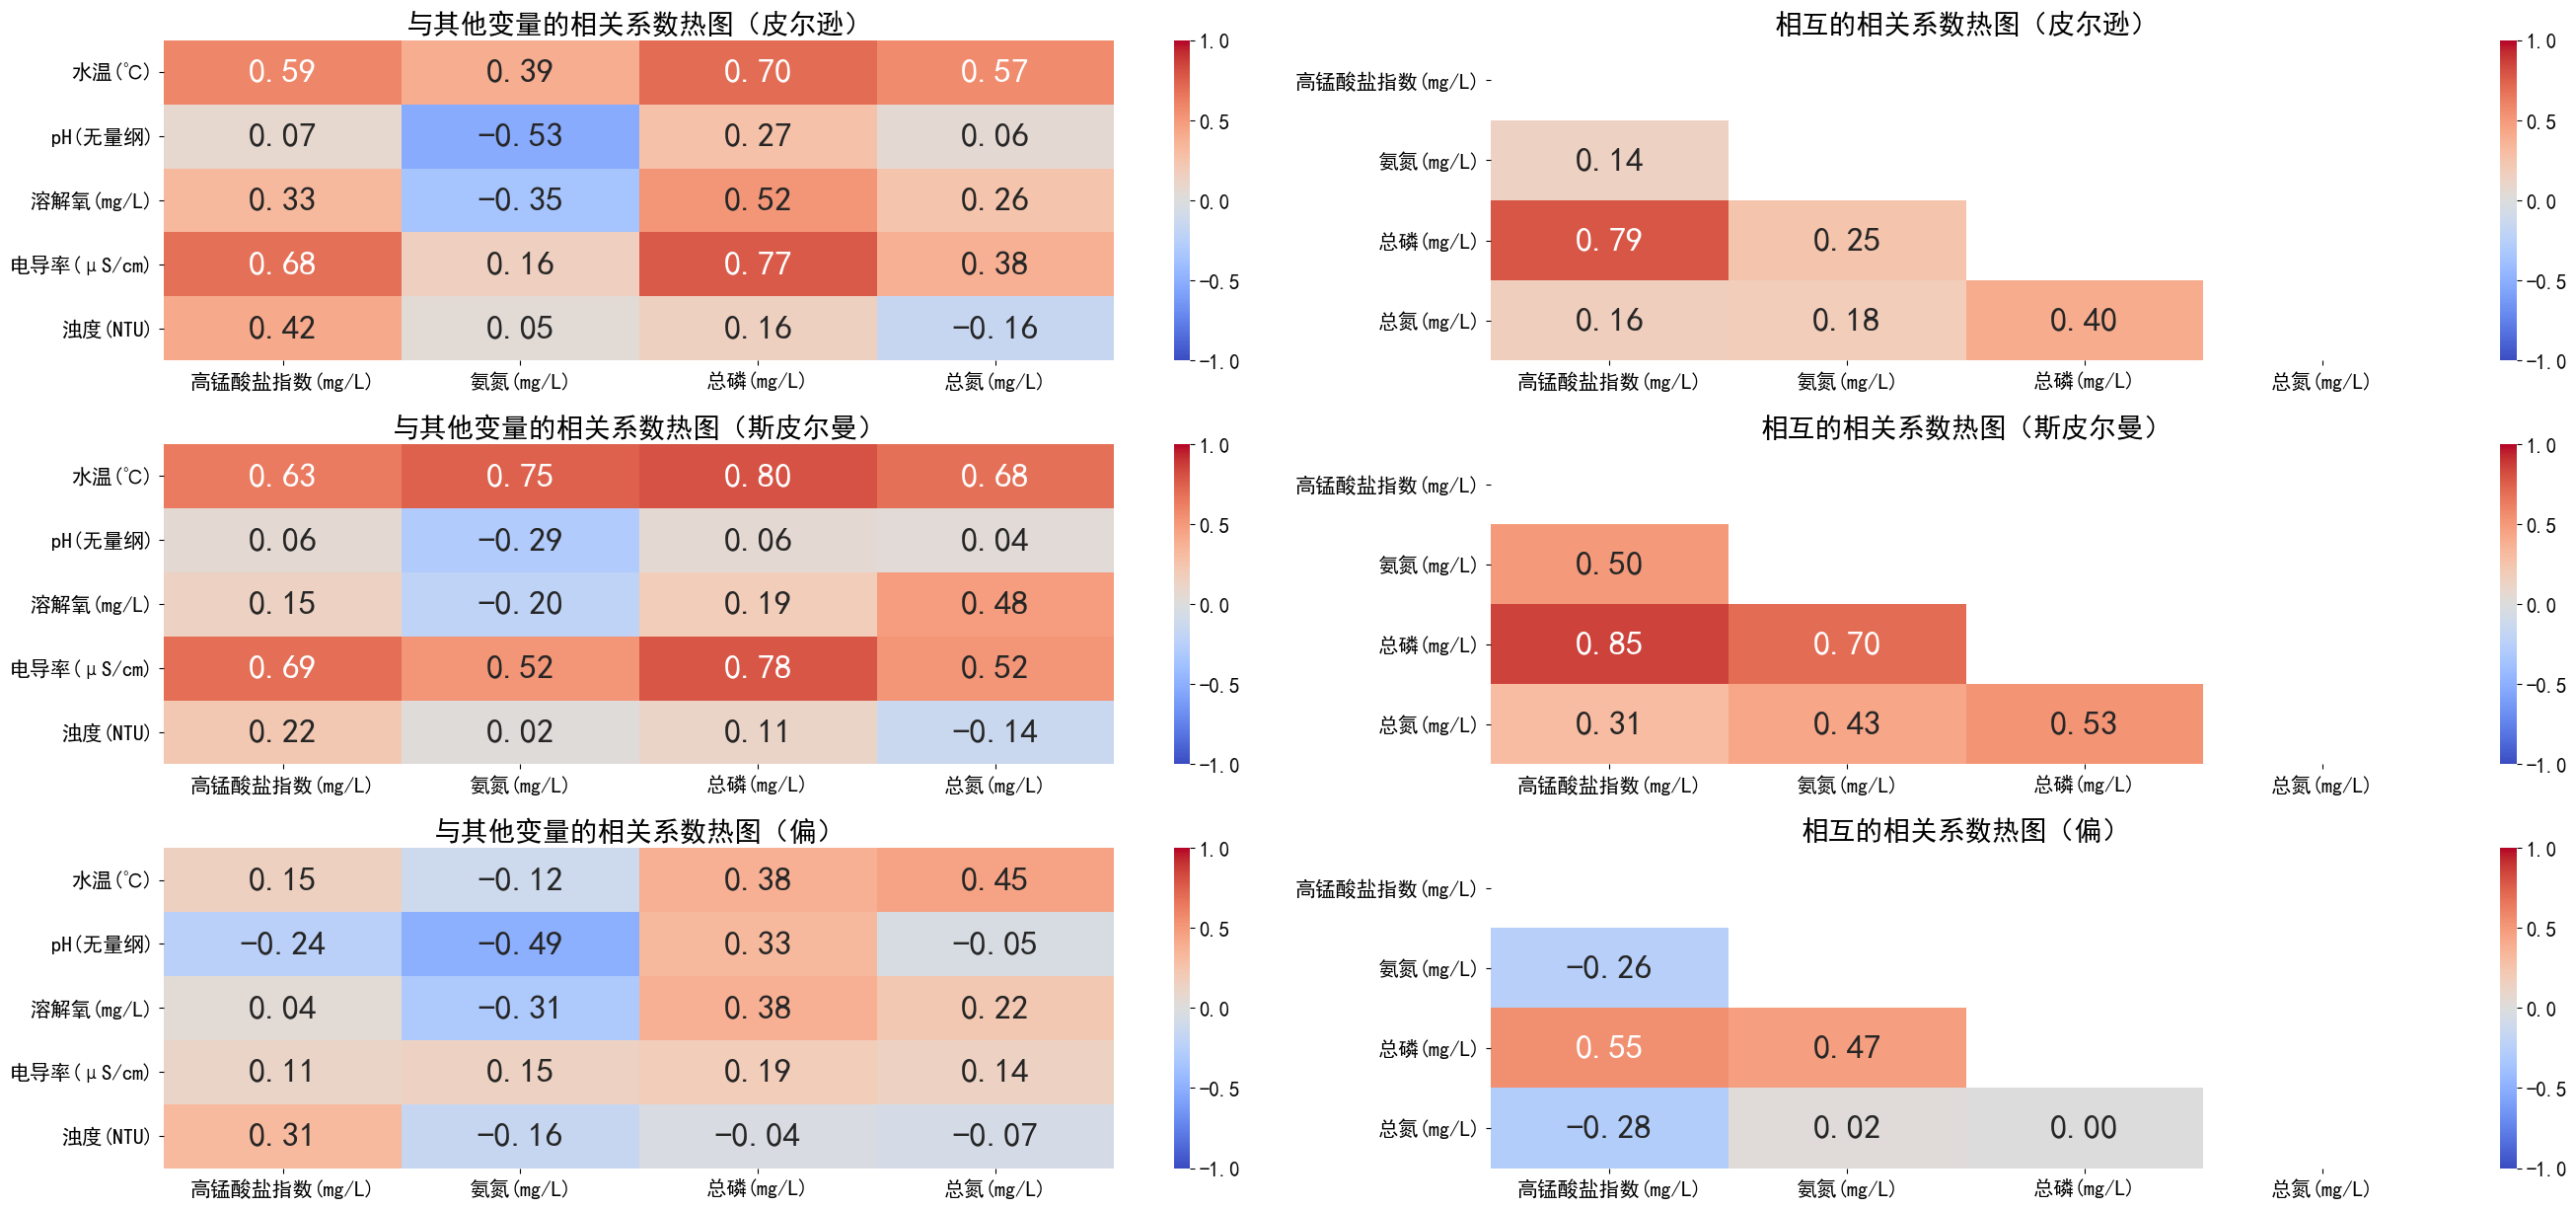

*******************皮尔逊********************
            高锰酸盐指数(mg/L)  氨氮(mg/L)  总磷(mg/L)  总氮(mg/L)
水温(℃)           0.590945  0.391394  0.697754  0.569897
pH(无量纲)         0.070878 -0.529866  0.269293  0.055486
溶解氧(mg/L)       0.327531 -0.352574  0.519767  0.255511
电导率(μS/cm)      0.679809  0.160553  0.767351  0.376019
浊度(NTU)         0.416024  0.046289  0.155017 -0.156458
              高锰酸盐指数(mg/L)  氨氮(mg/L)  总磷(mg/L)  总氮(mg/L)
高锰酸盐指数(mg/L)      1.000000  0.144135  0.788724  0.164347
氨氮(mg/L)          0.144135  1.000000  0.252549  0.184741
总磷(mg/L)          0.788724  0.252549  1.000000  0.400387
总氮(mg/L)          0.164347  0.184741  0.400387  1.000000


*******************斯皮尔曼*******************
            高锰酸盐指数(mg/L)  氨氮(mg/L)  总磷(mg/L)  总氮(mg/L)
水温(℃)           0.634768  0.749964  0.803029  0.680580
pH(无量纲)         0.061430 -0.293174  0.060613  0.037769
溶解氧(mg/L)       0.145614 -0.204019  0.186214  0.476734
电导率(μS/cm)      0.687719  0.523030  0.784951  0.522388
浊度(NTU)         0.2228

In [3]:
#皮尔逊相关系数
corr_mx = ana_ff1.corr()
corr_mx1 = corr_mx[['高锰酸盐指数(mg/L)','氨氮(mg/L)','总磷(mg/L)','总氮(mg/L)']]
corr_mx2 = corr_mx1.loc[['水温(℃)','pH(无量纲)','溶解氧(mg/L)','电导率(μS/cm)','浊度(NTU)']]
corr_mx3 = corr_mx1.loc[['高锰酸盐指数(mg/L)','氨氮(mg/L)','总磷(mg/L)','总氮(mg/L)']]
#斯皮尔曼秩相关系数
corr_mxs = ana_ff1.corr(method='spearman')
corr_mxs1 = corr_mxs[['高锰酸盐指数(mg/L)','氨氮(mg/L)','总磷(mg/L)','总氮(mg/L)']]
corr_mxs2 = corr_mxs1.loc[['水温(℃)','pH(无量纲)','溶解氧(mg/L)','电导率(μS/cm)','浊度(NTU)']]
corr_mxs3 = corr_mxs1.loc[['高锰酸盐指数(mg/L)','氨氮(mg/L)','总磷(mg/L)','总氮(mg/L)']]
#偏相关系数
pcorr_mx = ana_ff1.pcorr()
pcorr_mx1 = pcorr_mx[['高锰酸盐指数(mg/L)','氨氮(mg/L)','总磷(mg/L)','总氮(mg/L)']]
pcorr_mx2 = pcorr_mx1.loc[['水温(℃)','pH(无量纲)','溶解氧(mg/L)','电导率(μS/cm)','浊度(NTU)']]
pcorr_mx3 = pcorr_mx1.loc[['高锰酸盐指数(mg/L)','氨氮(mg/L)','总磷(mg/L)','总氮(mg/L)']]
#绘图
# # 将所有矩阵值合并到一个数组中  
# all_values = np.concatenate((corr_mx2.values.flatten(), corr_mx3.values.flatten(), corr_mxs2.values.flatten(), corr_mxs3.values.flatten()))  
# vmin = all_values.min()  
# vmax = all_values.max()  
plt.rcParams["figure.figsize"] = [27.50, 12.50]
ttfsz = 20#标题字体大小
plt.rcParams['font.size'] = 15
plt.subplot(3 ,2 ,1)
sns.heatmap(corr_mx2, annot=True,annot_kws={'size':25}, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('与其他变量的相关系数热图（皮尔逊）', fontsize=ttfsz)
plt.subplot(3 ,2 ,2)
mask = np.triu(np.ones_like(corr_mx3, dtype=bool), k=1) 
np.fill_diagonal(mask, True) 
sns.heatmap(corr_mx3, mask=mask, annot=True,annot_kws={'size':25}, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('相互的相关系数热图（皮尔逊）', fontsize=ttfsz)
plt.subplot(3 ,2 ,3)
sns.heatmap(corr_mxs2, annot=True,annot_kws={'size':25}, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('与其他变量的相关系数热图（斯皮尔曼）', fontsize=ttfsz)
plt.subplot(3 ,2 ,4)
mask = np.triu(np.ones_like(corr_mxs3, dtype=bool), k=1) 
np.fill_diagonal(mask, True) 
sns.heatmap(corr_mxs3, mask=mask, annot=True,annot_kws={'size':25}, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('相互的相关系数热图（斯皮尔曼）', fontsize=ttfsz)
plt.subplot(3 ,2 ,5)
sns.heatmap(pcorr_mx2, annot=True,annot_kws={'size':25}, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('与其他变量的相关系数热图（偏）', fontsize=ttfsz)
plt.subplot(3 ,2 ,6)
mask = np.triu(np.ones_like(pcorr_mx3, dtype=bool), k=1) 
np.fill_diagonal(mask, True) 
sns.heatmap(pcorr_mx3, mask=mask, annot=True,annot_kws={'size':25}, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('相互的相关系数热图（偏）', fontsize=ttfsz)


plt.tight_layout()
plt.show()
print("*******************皮尔逊********************")
print(corr_mx2)
print(corr_mx3)
print("\n")
print("*******************斯皮尔曼*******************")
print(corr_mxs2)
print(corr_mxs3)
print("\n")
# print("*******************作差**********************")
# print(corr_mx2-corr_mxs2)
# print(corr_mx3-corr_mxs3)
# print('\n')
print("*******************偏************************")
print(pcorr_mx2)
print(pcorr_mx3)



### 主成分分析法

#### 创建类

In [4]:
import numpy as np
from numpy import linalg 

class PCA:
    ''' dataset 形如array([样本1,样本2,...,样本m]),每个样本是一个n维的ndarray'''
    
    def __init__(self, dataset):
    	# 这里的参数跟上文是反着来的(每行是一个样本)，需要转置一下
        self.dataset = np.matrix(dataset, dtype='float64').T

    # def standard2(self, dataset):
    #     scaler = StandardScaler()
    #     scaled_data = scaler.fit_transform(np.asarray(dataset))
    #     # scaled_df = pd.DataFrame(scaled_data)
    #     # return scaled_df
    
    def standard(self, dataset):
        '''标准化'''

        for (index, line) in enumerate(dataset):
            dataset[index] -= np.mean(line)
            # np.std(line, ddof = 1)即样本标准差(分母为n - 1)
            dataset[index] /= np.std(line, ddof = 1)

    def get_eig_vector(self, data, Cov):
        '''求特征值和特征向量'''

        eigs, vectors = linalg.eig(Cov)
        # print(vectors)
        for i in range(len(eigs)):
            data.append((eigs[i], vectors[:, i]))
            # 按照特征值从大到小排序
            data.sort(key = lambda x: x[0], reverse = True)
        return eigs
    
    def principal_comps(self, threshold = 0.85):
        '''求主成分。threshold可选参数表示方差累计达到threshold后就不再取后面的特征向量。
        返回值是特征值、特征向量、方差贡献率、累计方差贡献率。'''

        ret = []
        data = []
        self.standard(self.dataset)
        Cov = np.cov(self.dataset)
        eigs = self.get_eig_vector(data, Cov)
        sum = 0
        for comp in data:
            sum += comp[0] / np.sum(eigs)
            ret.append(
                    tuple(
                        map(lambda x: np.round(x, 5)
                            # 特征值、特征向量、方差贡献率、累计方差贡献率
                            , (comp[0], comp[1], comp[0] / np.sum(eigs), sum))
                        )
                    )
            if sum > threshold:
                return ret      

        return ret 
# PMx = PCA(anal)
# op = PMx.principal_comps(threshold=0.85)

#### 数据准备

In [5]:
#准备数据
# its = ['MnOx', 'Nh3_N', 'a_P', 'a_N']
# for it in its:
#     exec(f"{it} = excel.drop(['高锰酸盐指数(mg/L)', '氨氮(mg/L)','总磷(mg/L)', '断面名称', '总氮(mg/L)', '水质类别'], axis=1)")
# 实际上上面的纯纯多此一举，但是还是用注释保留下来了。。可以用exec()实现执行写在字符串里的代码，然后达到循环创建变量的效果

#准备原始数据
anal = excel.drop(['高锰酸盐指数(mg/L)', '氨氮(mg/L)','总磷(mg/L)', '断面名称', '总氮(mg/L)', '水质类别'], axis=1)
index = ['水温(℃)','pH(无量纲)','溶解氧(mg/L)','电导率(μS/cm)','浊度(NTU)']
#输出用
output = [['高锰酸盐', '高锰酸盐指数(mg/L)'], ['氨氮', '氨氮(mg/L)'], ['总磷', '总磷(mg/L)'],['总氮', '总氮(mg/L)']]
     
# print(excel.columns)

#绘制影响因子图用
x_label = pd.read_excel('影响因子图.xlsx', sheet_name='Sheet5', header=None).squeeze()
y_labels = {  
    '高锰酸盐指数(mg/L)': 'purple',  
    '氨氮(mg/L)': 'red',  
    '总磷(mg/L)': 'green',  
    '总氮(mg/L)': 'orange'  
}  
def standard(data):
    '''标准化'''
    opt = (data - data.mean()) / data.std()

    return opt


#### 分析

In [6]:
with pd.ExcelWriter('output.xlsx') as writer:
    for ii in output:
        PMx = PCA(anal)
        op = PMx.principal_comps(threshold=0.85)
        opd = pd.DataFrame(op, columns=['特征值', '特征向量', '方差贡献率', '累计方差贡献率'])
        # print(opd)
        opd.to_excel('analyse.xlsx', index=True)
        matrix = pd.DataFrame(index=index)
        for i in range(len(op)):
            matrix[i] = op[i][1]
        #result是主成分
        result = np.dot(anal, matrix)
        # print(result)
        model = LinearRegression()
        y = np.array(excel[ii[1]])
        x = np.array(result)
        model.fit(y=standard(y), X=x)
        result_mid = np.dot(matrix, model.coef_.T)
        pd.set_option('display.float_format', lambda x: '%.6f' % x)
        # print(result2)
        matrix['主成分回归系数'] = result_mid
        # print(matrix)
        matrix.to_excel(writer, sheet_name=ii[0], float_format='%.6f', index=True)
# print(result)

# 载荷系数=原始变量与主成分之间的相关系数
for i in range(3):
    for j in index:
        load = pd.DataFrame([result[:, i], anal[j]])
        # print(load)
        print(load.iloc[0].corr(load.iloc[1]))
    print('\n')

-0.6001224812254912
-0.2816158473575108
-0.41769963775415675
-0.9998986351000334
-0.3289306016876598


0.6007025788406584
0.24442404155512423
0.3764822904026416
0.9981386810657304
0.38516137873354156


0.33745288676116075
0.09693113306486974
0.1978701677997087
0.8095006514477295
0.816418468371884




#### 相关系数矩阵及其热图

               水温(℃)   pH(无量纲)  溶解氧(mg/L)  电导率(μS/cm)   浊度(NTU)
水温(℃)       1.000000 -0.146627   0.120188    0.599179  0.062045
pH(无量纲)    -0.146627  1.000000   0.688104    0.274287 -0.184349
溶解氧(mg/L)   0.120188  0.688104   1.000000    0.405482 -0.122119
电导率(μS/cm)  0.599179  0.274287   0.405482    1.000000  0.330793
浊度(NTU)     0.062045 -0.184349  -0.122119    0.330793  1.000000


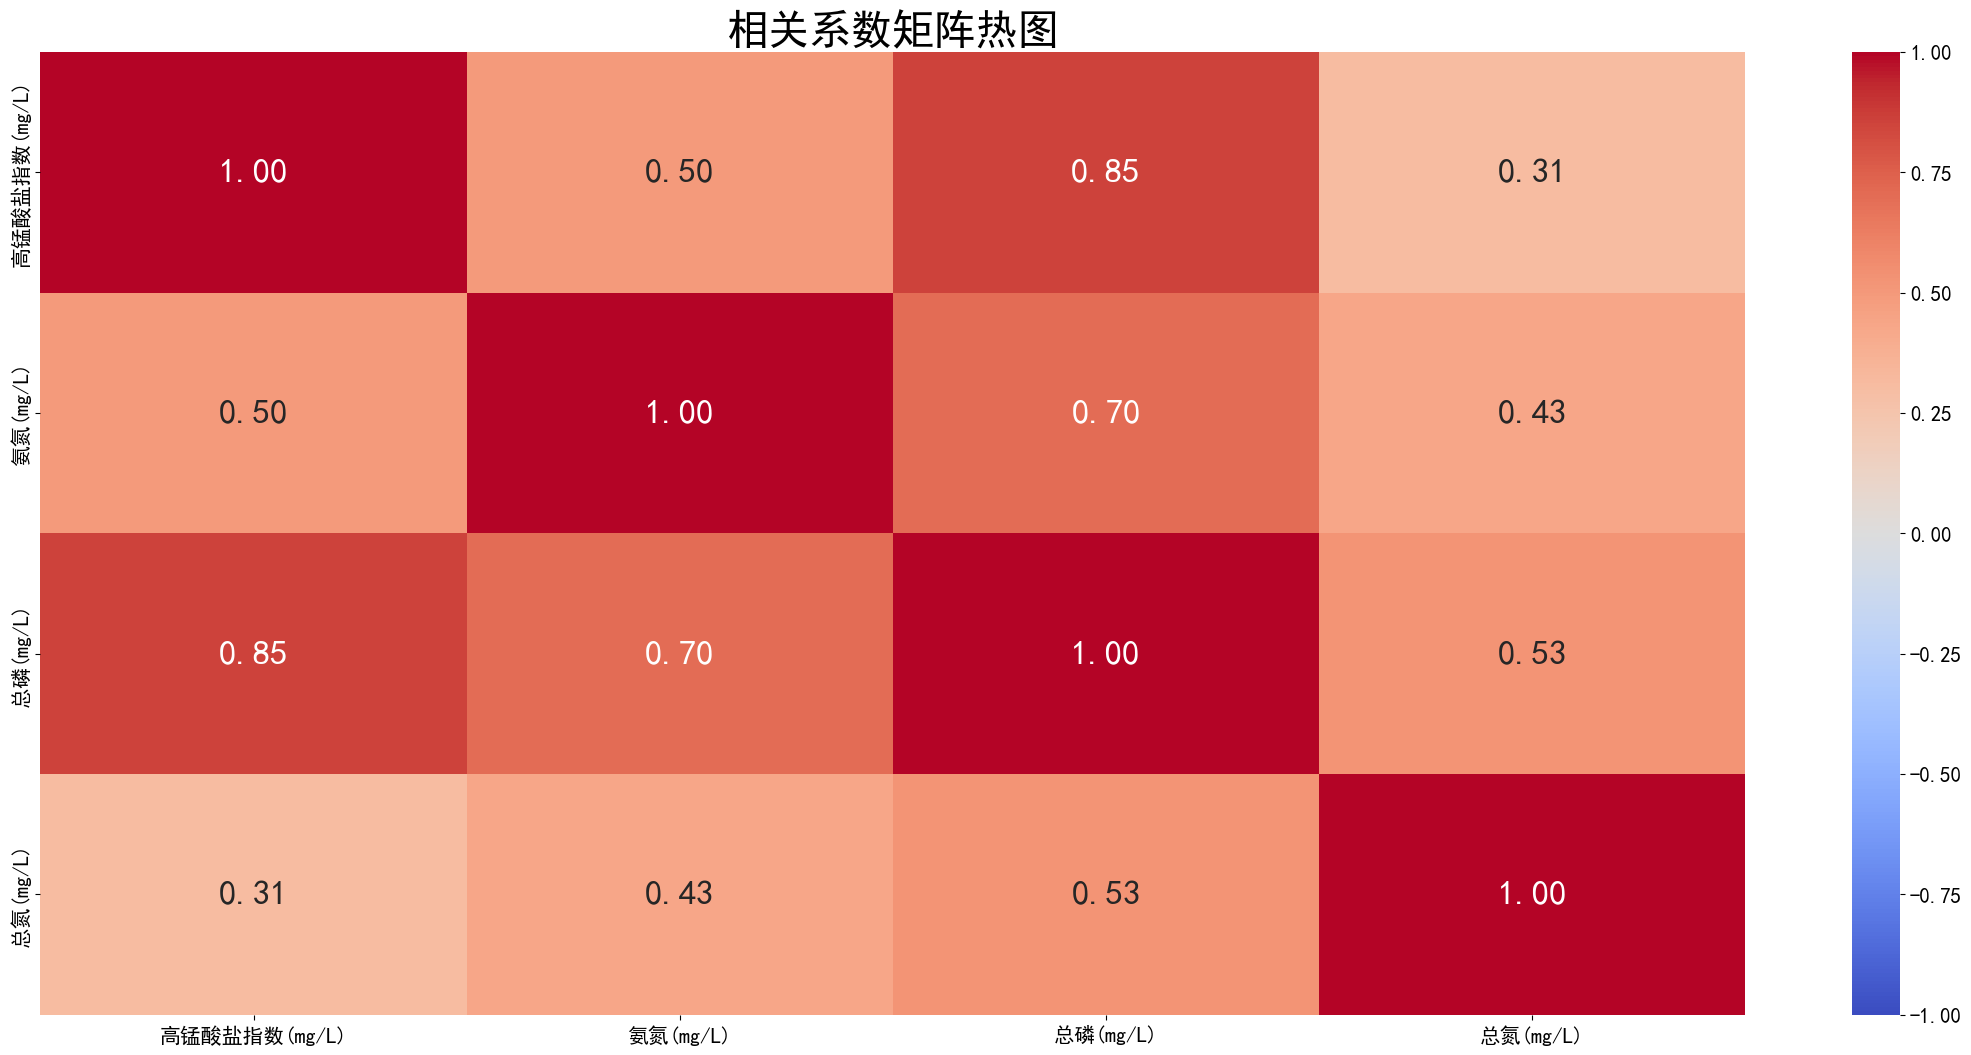

In [9]:
#需要一个相关系数矩阵
print(anal.corr())
# mask = np.triu(np.ones_like(corr_mxs3, dtype=bool), k=1) 
# np.fill_diagonal(mask, True) 
# sns.heatmap(corr_mxs3, mask=mask, annot=True,annot_kws={'size':25}, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
sns.heatmap(corr_mxs3, annot=True,annot_kws={'size':25}, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('相关系数矩阵热图', fontsize=30)
plt.show()

#### 影响因子 

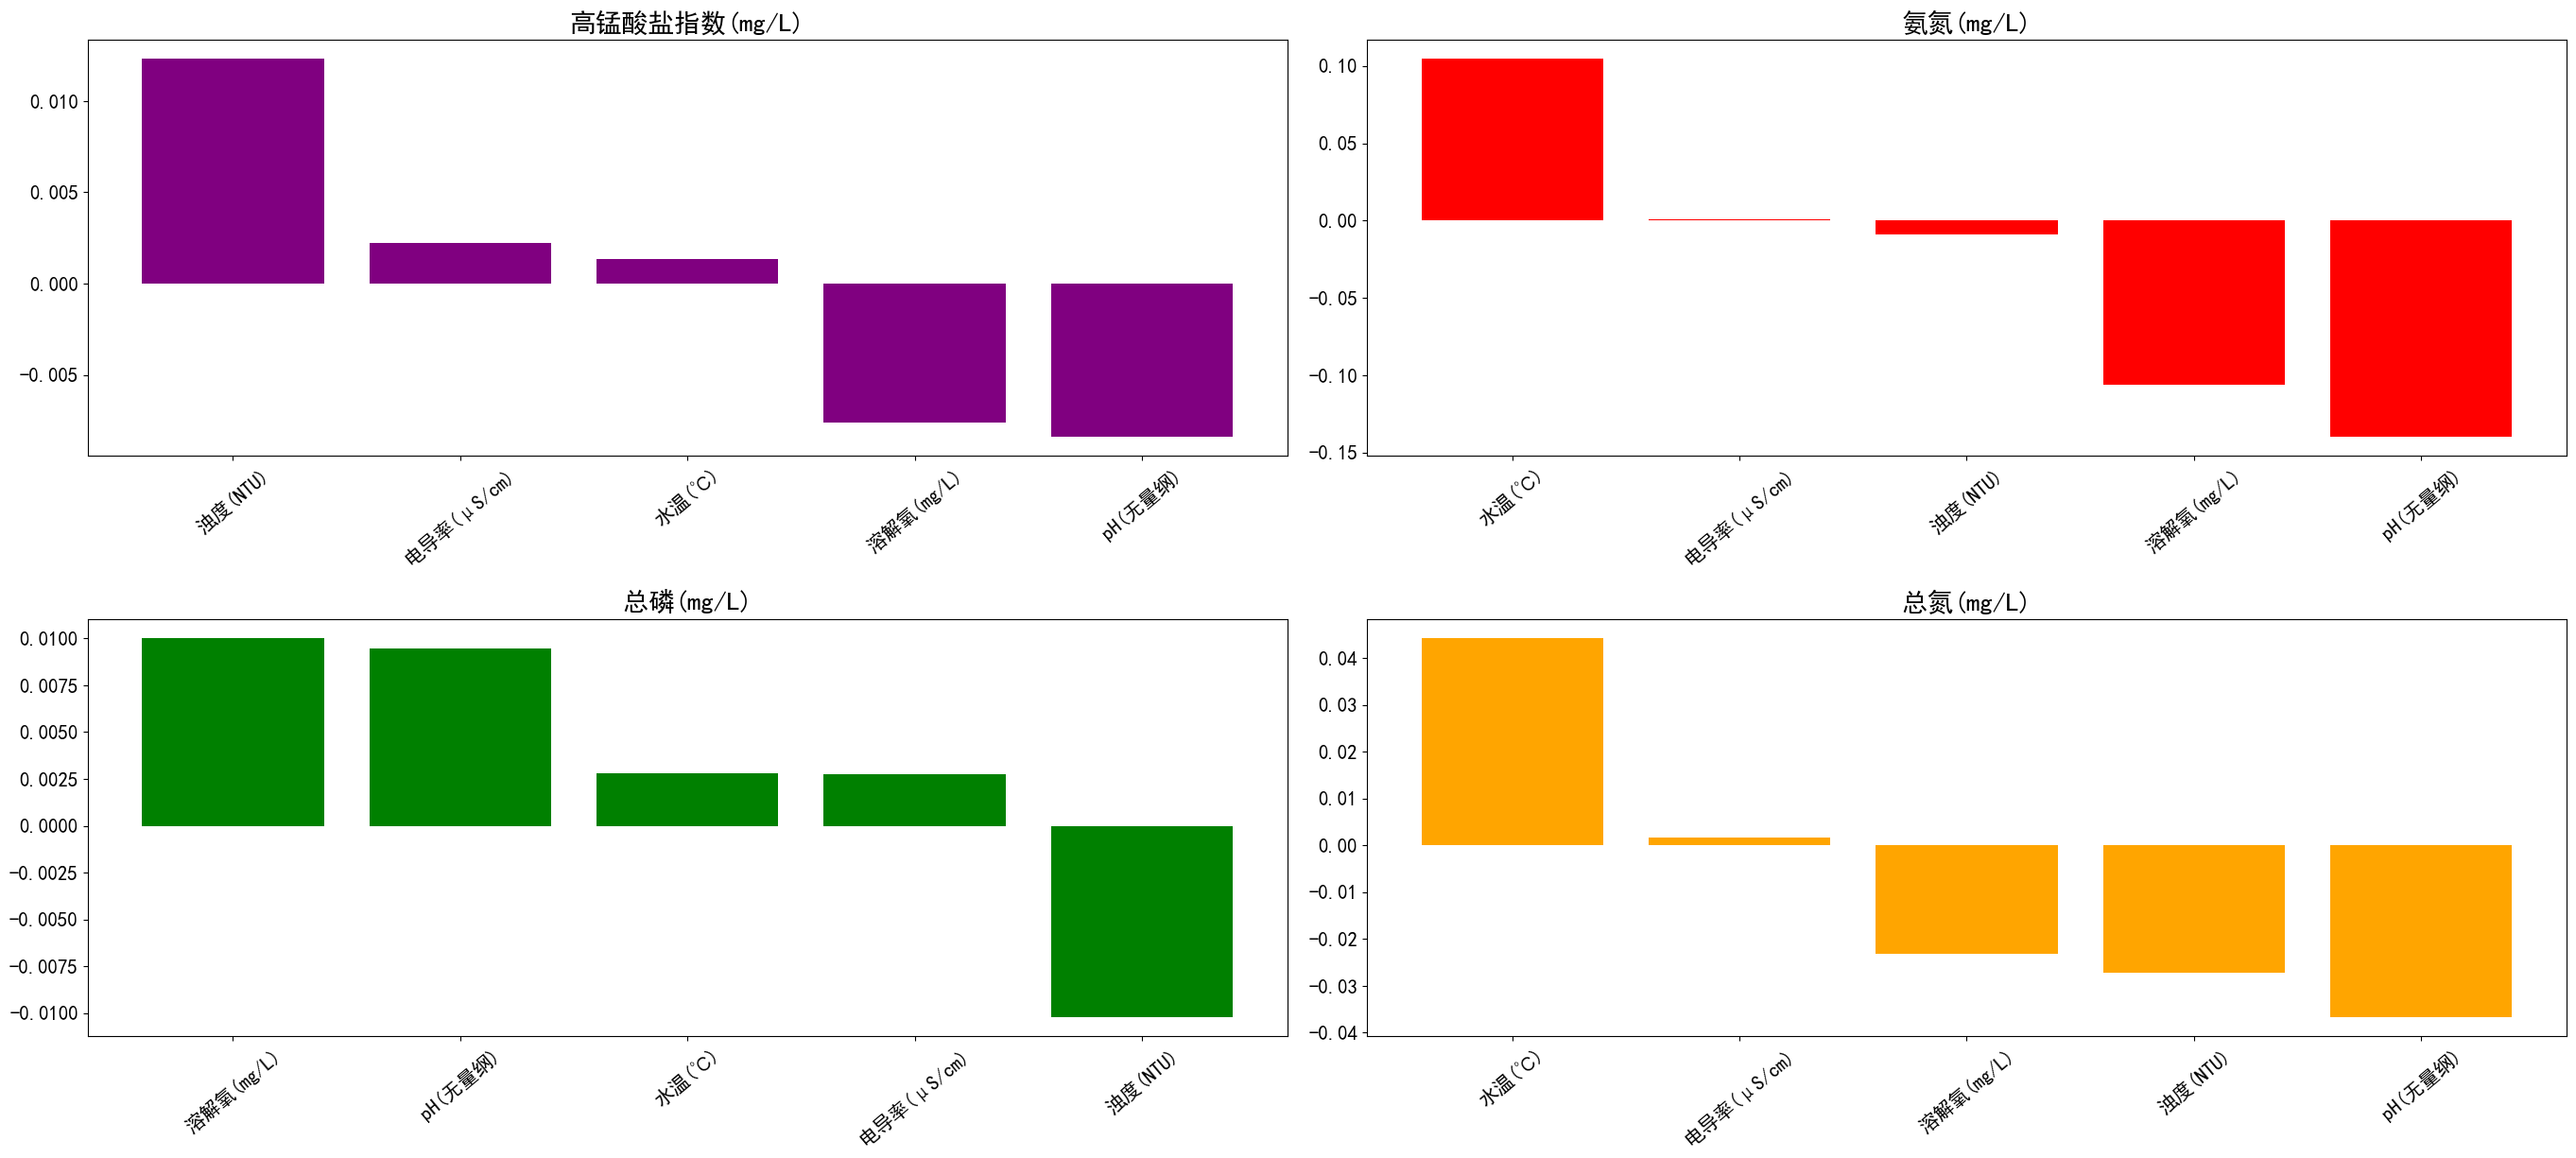

In [8]:
for i, (ylabel, color) in enumerate(y_labels.items(), start=1):
    inf = pd.read_excel('影响因子图.xlsx', sheet_name=f'Sheet{i}', header=None).squeeze()  
    # print(list(inf))
    # print(list(x_label))
    plt.subplot(2, 2, i)  # 根据循环的索引选择子图位置  
    plt.bar(list(x_label[i-1]), list(inf), color=color, label=ylabel)  
    plt.xticks(rotation=40, fontsize=15) 
    plt.title(ylabel,fontsize=20)  
    plt.gca().xaxis.set_tick_params(labelrotation=40)

plt.tight_layout()
plt.show()